# Case Study: Regression 

**Table of contents:**  
1.[Importing libraries to start wrangling and plotting](#1.Importing-libraries-to-start-wrangling-and-plotting)  
2.[Import data](#2.Import-data)  
3.[Start cleaning](#3.Start-cleaning)  
4.[EDA](#4.EDA)  
5.[Preparing log that will plot the results](#5.Preparing-log-that-will-plot-the-results)  
6.[Pre processing / Wrangling and execution of linear regression model](#6.Pre-processing-/-Wrangling-and-execution-of-linear-regression-model)  
 - [1st run: measuring baseline](#1st-run:-Measuring-a-baseline-with-simple-scaling-of-variables-and-almost-no-wrangling)
 - [2nd run: breaking multicollinearity](#2nd-run:-breaking-multicollinearity)
 - [3rd run: managing renovation_date](#3rd-run:-managing-renovation_date)
 - [4th run: converted construction_year](#4th-run:-converted-construction-year) 
 - [5th run: using scaler on year columns](#5th-run:-using-scaler-on-year-columns) 
 - [6th, 7th, 8th, 9th run: testing which sqft columns to use](#6th-run:-testing-more-recent-sqft-measure-columns)
 - [10th run: applying logarithmic scaling to numerical variables](#10th-run:-applying-logarithmic-scaling-to-numerical-variables)
 - [11th run: bringing foreign data to classify the different areas](#11th-run:-bringing-foreign-data-to-classify-the-different-areas)
 - [12th run: turning city, waterfront, and floors into categorical data](#12th-run:-turning-city,-waterfront-and-floors-into-categorical-data)
 - [13th, 14th, 15th run: removing outliers](#13th-run:-removing-outliers-with-binning)
 - [16th run: trying other scaling methods](#16th-run:-trying-other-scaling-methods)  
 
7.[Conclusions](#7.-Conclusions)  
8.[Putting it all together, final attempt](#8.-Putting-all-together)
 
 
## Introduction 

For this case study we are looking to a database of properties sold in Washington, USA, in the area surrounding the city of Seattle. We will focus in create and apply a function tool that will log our iterations of fitting and testing a linear regression model to the data facilitated.   

At the same time we will gain insight in the data, and go through different wrangling techniques in each iteration, to learn better about what actions are favouring the model, and which ones are detrimental. 

We started with a r2 score of 69.5 % and a Mean Absolute Error of 126197$ in the first iteration, and we worked our way not far off, improving the model up to a r2 score of 77 percent, and a mean absolute error of 105310 dollars. 

For more information on the development process, please refer to the readme file



## 1.Importing libraries to start wrangling and plotting 

In [1]:
#Libraries for tables manipulation
import pandas as pd
import numpy as np

#Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime
%matplotlib inline

#To not receive warning messages
import warnings
warnings.filterwarnings('ignore')

#Libraries for linear regression modelling and evaluation
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,explained_variance_score

#Preprocessing libraries
from sklearn.preprocessing import minmax_scale 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

## 2.Import data

In [2]:
data = pd.read_csv('C:/Users/asomm/Desktop/Iron-bcamp/Case-Study-Regression/data/regression_data.csv',
                   names = ['id','date_sold','bedrooms','bathrooms','sqft_living','sqft_lot', 'floors',
                           'waterfront','view','cond','grade','sqft_above','sqft_basement','yr_built',
                           'yr_renovated','zipcode','latitude','longitude','sqft_living15','sqft_lot15','price'])

In [3]:
data

,id,date_sold,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,cond,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/14,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2/23/15,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,6/23/14,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,1/16/15,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date_sold      21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   cond           21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  latitude       21597 non-null  float64
 17  longitude      21597 non-null  float64
 18  sqft_l

## 3.Start cleaning
We will start by preparing the data to export, to be used later in Tableau, setting dtypes, and creating new columns with better information to be plotted. 
Happily we do not have any null values, so we can jump directly into removing duplicates, checking the data types, and see if there are any spelling errors, or input errors in our data. 
* let's first check for duplicated rows 

In [5]:
sum(data.duplicated())

0

* We start with setting the date_sold column into a datetime series 

In [6]:
data['date_sold'] = pd.to_datetime(data['date_sold'])

In [7]:
data['date_sold'].loc[4]

Timestamp('2015-02-18 00:00:00')

* We can loop over the columns value counts() to further explore other columns:

In [8]:
for col in data.columns:
    print ('\n------'+col+'------\n')
    print(data[col].value_counts())


------id------

795000620     3
1568100300    2
2892700041    2
1450100390    2
3395040550    2
             ..
2595650170    1
7212651100    1
9808700025    1
6772200055    1
2424410110    1
Name: id, Length: 21420, dtype: int64

------date_sold------

2014-06-23    142
2014-06-26    131
2014-06-25    131
2014-07-08    127
2015-04-27    126
             ... 
2014-05-17      1
2014-07-27      1
2014-08-03      1
2014-11-02      1
2015-05-24      1
Name: date_sold, Length: 372, dtype: int64

------bedrooms------

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

------bathrooms------

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50      

* We can see there are duplicated IDs, let's find out why. 

In [9]:
data['id'].value_counts()

795000620     3
1568100300    2
2892700041    2
1450100390    2
3395040550    2
             ..
2595650170    1
7212651100    1
9808700025    1
6772200055    1
2424410110    1
Name: id, Length: 21420, dtype: int64

In [10]:
data[data['id']==795000620]

,id,date_sold,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,cond,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,sqft_living15,sqft_lot15,price
17588,795000620,2014-09-24,3,1.0,1080,6250,1.0,0,0,2,...,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,115000
17589,795000620,2014-12-15,3,1.0,1080,6250,1.0,0,0,2,...,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,124000
17590,795000620,2015-03-11,3,1.0,1080,6250,1.0,0,0,2,...,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,157000


These three listings indicate that the same house has been sold three times with different prices, so we will keep these duplicates, as it adds up value to the prediction we will want to calculate later. 

* Then we can look into why the number of floors of the property is a float. 

In [11]:
data['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

Seeing that half floors are common, we leave it as it is. Later we could put turn this data to categorical, as more floors don't necessarily mean the property is better, as many people value the house to be at floor level.  

We don't see any more corrupted data, there might be indeed outliers, but we will deal with them either in our Tableau visualizations, or later while doing the wrangling and preprocessing for the regression models. 

### More cleaning to prepare for models application
* Checking the distribution of numerical variables

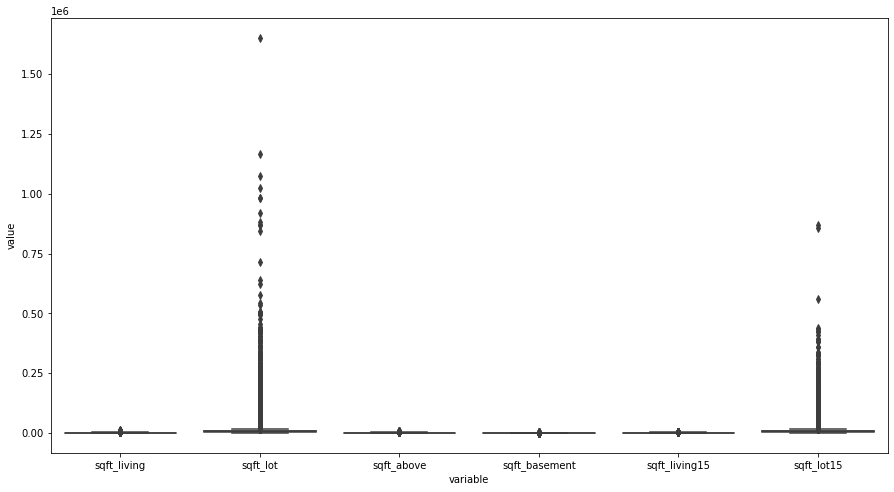

In [12]:
plt.figure(figsize=(15,8))
sns.boxplot(x="variable", y="value", data=pd.melt(data[['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']]));

We can see there are several listings that are very off the majority of the data, but we expect this from real estate listings. We will visualize the data in Tableau and locate anomalies, and use those conclusions to remove rows later before the pre-processing stage. We want to measure the impact of removing these outliers, so we will leave it for a latter moment. 

 ### * At this point we can export the data to create visualizations in tableau. 

In [13]:
data = data.reset_index(drop=True)

data.to_csv("C:/Users/asomm/Desktop/Iron-bcamp/Case-Study-Regression/tableau/export_ready_tableau.csv")

## 4.EDA

What we are asked to analyse is to predict the price of the properties, based on the characteristics of the listings. 
Based on observations in Tableau, we can conclude that:
* several factors are directly correlated to the price of the property in average. We will explore these here further and plan measures of wrangling that will be carried later on, when we are testing the model.
* As an extra question, we are challenged to think what should a listing have in order to be valued over 650,000$, so we will draw a horizontal line at each graph to also understand what is the cutting line for these characteristics.

**Number of Bathrooms**

Text(0, 0.5, 'Average price')

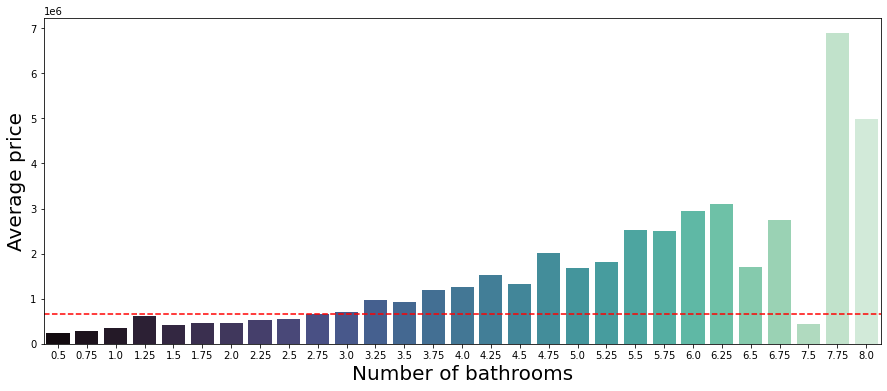

In [14]:
plt.figure(figsize=(15,6))

plt.axhline(650000, ls='--',color='red')
datavis = data.groupby(["bathrooms"], as_index=False).agg({"price": np.mean})
plot = sns.barplot(data = datavis , x = 'bathrooms',y = 'price',palette="mako")
plot.set_xlabel("Number of bathrooms",fontsize=20)
plot.set_ylabel("Average price",fontsize=20)

* Cleaning steps: From tableau we know that there are only 9 listings with 1.25 bathrooms, and listings with 1 and 1,5 are much more abundant, so we would discard the listings with 1.25 bathrooms as outliers.

* Apparently seems that listings with 3 or more bathrooms tend to be priced over our target price.

* The amount of data over 6 bathrooms is really small, so we will put all those listings in a bucket of 6+ bathrooms, as we will turn it later into categorical data

**Number of Bedrooms**

Text(0, 0.5, 'Average price')

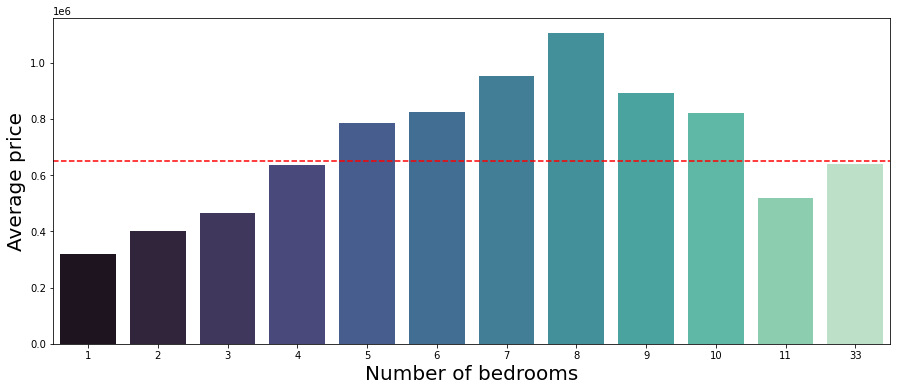

In [15]:
plt.figure(figsize=(15,6))

plt.axhline(650000, ls='--',color='red')
datavis = data.groupby(["bedrooms"], as_index=False).agg({"price": np.mean})
plot = sns.barplot(data = datavis , x = 'bedrooms',y = 'price',palette="mako")
plot.set_xlabel("Number of bedrooms",fontsize=20)
plot.set_ylabel("Average price",fontsize=20)

* Cleaning steps: again from tableau we could see that the amount of listings was smaller and smaller as we were going further from 6 bedrooms, so we can also turn it into categorical, and make everything over 6 bedrooms into a 6+ bedroom bin.
* Our line indicated that 4+ bedrooms is a good start in order to pass our 650000 price tag

**Number of floors**

Text(0, 0.5, 'Average price')

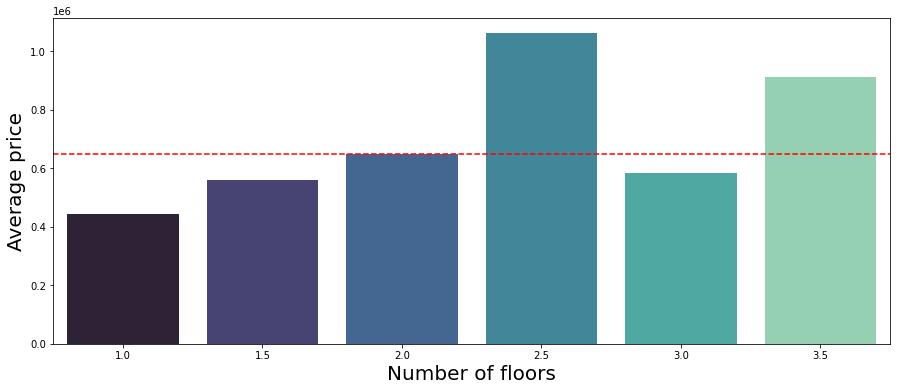

In [16]:
plt.figure(figsize=(15,6))

plt.axhline(650000, ls='--',color='red')
datavis = data.groupby(["floors"], as_index=False).agg({"price": np.mean})
plot = sns.barplot(data = datavis , x = 'floors',y = 'price',palette="mako")
plot.set_xlabel("Number of floors",fontsize=20)
plot.set_ylabel("Average price",fontsize=20)

* From our tableau visualization we could see that less than 0.75% of listings actually have 2.5 floors, also 0.03% of the data have 3.5 floors, so we will consider anything bigger than 2 floors to be detrimental to the price of the property, as i imagine it is a hassle unless there is an elevator installed, or extra things need to be mantained. They will also go to a bin of 2,5+ floors

**Grading of the property**

Text(0, 0.5, 'Average price')

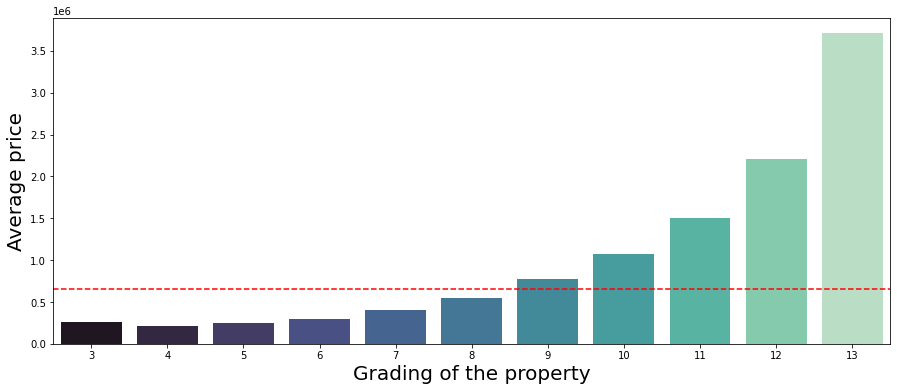

In [17]:
plt.figure(figsize=(15,6))

plt.axhline(650000, ls='--',color='red')
datavis = data.groupby(["grade"], as_index=False).agg({"price": np.mean})
plot = sns.barplot(data = datavis , x = 'grade',y = 'price',palette="mako")
plot.set_xlabel("Grading of the property",fontsize=20)
plot.set_ylabel("Average price",fontsize=20)

* We can assume that the average price of the property directly correlates with the grade.
* We would need to achieve a grade of 9 or more to be able to sell at the price we want. Following King County's real estate grading, that means that on top of meeting the building code, and being above average in construction, design and better materials in the finishes, it should have a better architectural design, high quality features, larger square footage, and everything above that. 
* Anything between 1 and 3 means that it falls short of minimum building standards. In our data we only have one listing with that grade, and the price hikes a bit probably because it's in a good location, so we will discard it to improve our model prediction.

**Summary to achieve property sale price over 650,000$**

From our exploration in Tableau and this analysis we concluded that the biggest factor that affects the price of the property is the location of it. However, some factors show high influence in the price:
* 85% of properties over 650000 dollars are graded 8 or over, while only 35 percent of those under 650k do 
* 80% of higher level properties have more than 3 bathrooms while only 42 percent of the ones under do
* 65% of high tier listings have 4 or more bedrooms, while only 26% of the less expensive ones do  
* Most of of the $650k+ listings have two floors, but many have also one. 
* More of the higher priced listings have a viev than the lower ones, but very expensive listings also don't have a view, but this is very related to location too. 
* Being in the waterfront will substantially increase our sale prize. the average of being in the waterfront is around 300% higher than not being in the waterfront. 
* Average price of properties built around 1900-1940 is around or over our target. In average, only new built properties achieve those higher averages. 

**Describing the numerical values**

In [18]:
data.drop(['id','bedrooms','bathrooms','floors','waterfront','view','cond','grade','zipcode','latitude','longitude'],axis = 1).describe()

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
count,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,2080.321850,1.509941e+04,1788.596842,291.725008,1970.999676,84.464787,1986.620318,12758.283512,5.402966e+05
std,918.106125,4.141264e+04,827.759761,442.667800,29.375234,401.821438,685.230472,27274.441950,3.673681e+05
min,370.000000,5.200000e+02,370.000000,0.000000,1900.000000,0.000000,399.000000,651.000000,7.800000e+04
25%,1430.000000,5.040000e+03,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000,3.220000e+05
50%,1910.000000,7.618000e+03,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000,4.500000e+05
75%,2550.000000,1.068500e+04,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000,6.450000e+05
max,13540.000000,1.651359e+06,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000,7.700000e+06


**Looking for correlation of price / size of the property**

In [19]:
#Want to create a series with 3 bins to colour code how far the listings are from Bellevue, a central very expensive area,
#in order to have a better understanding of the data. 
distance = pd.cut((((data['latitude']-47.6262)**2+(data['longitude']+122.234)**2)**(1/2)),
                                       3,
                                      labels=["near","medium","far"])

Text(0, 0.5, 'Price')

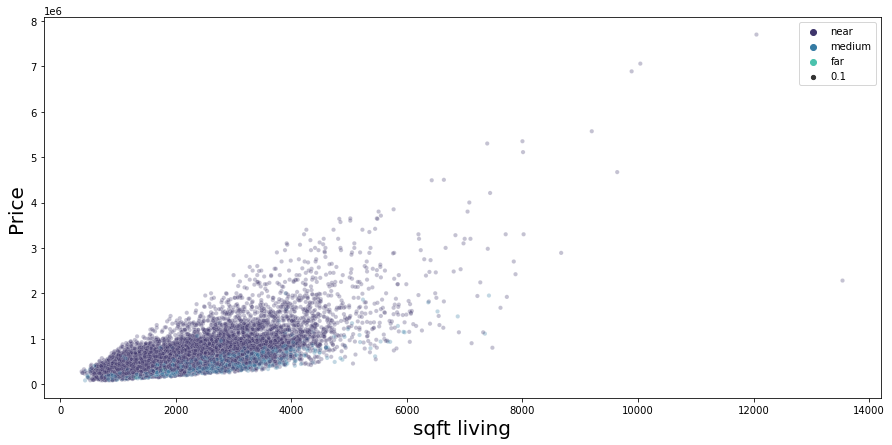

In [20]:
plt.figure(figsize=(15,7))
xplt = 'sqft_living'
yplt = 'price'
plot = sns.scatterplot(data = data, y = yplt, x = xplt ,hue = distance, size=.1,alpha =.3,palette="mako")
plot.set_xlabel("sqft living",fontsize=20)
plot.set_ylabel("Price",fontsize=20)

* We can see a clear correlation between the living area and the price. Darker spots show listings near downtown area, while larger spots in the bottom side of the cluster indicate listings being cheaper further away.

Text(0, 0.5, 'Price')

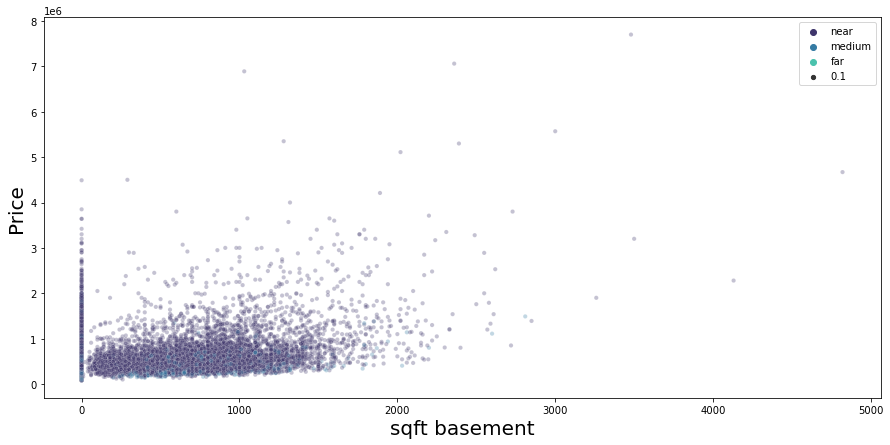

In [21]:
plt.figure(figsize=(15,7))
xplt = 'sqft_basement'
yplt = 'price'
plot = sns.scatterplot(data = data, y = yplt, x = xplt ,hue = distance , size=.1,alpha =.3,palette="mako")
plot.set_xlabel("sqft basement",fontsize=20)
plot.set_ylabel("Price",fontsize=20)

* Regarding basement prices we don't see such a strong correlation, but bigger basements show bigger prices, proably because they belong to bigger houses. Many of the listings have still high price so i do not think is very decisive in the listing price. 

Text(0, 0.5, 'Price')

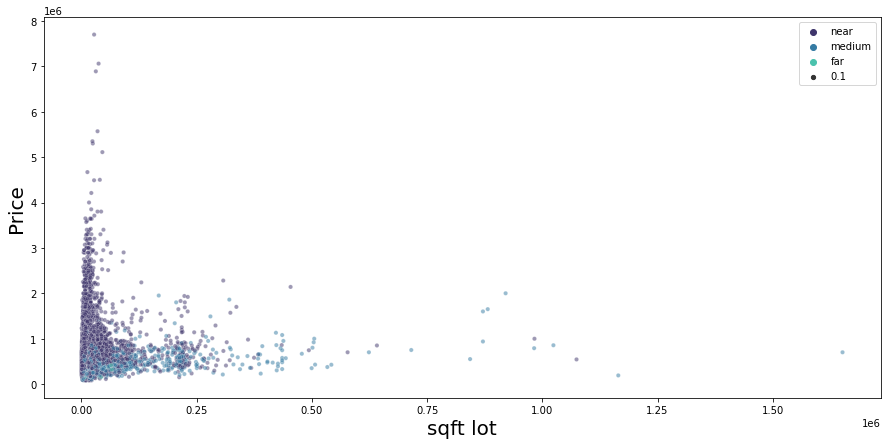

In [22]:
plt.figure(figsize=(15,7))
xplt = 'sqft_lot'
yplt = 'price'
plot = sns.scatterplot(data = data, y = yplt, x = xplt ,hue = distance , size=.1,alpha =.5,palette="mako")
plot.set_xlabel("sqft lot",fontsize=20)
plot.set_ylabel("Price",fontsize=20)

* Here we can find that listings with higher prices don't necessarily have bigger plots, and the ones with bigger plots are listings further away from the central area.

**Distribution of numerical variables**

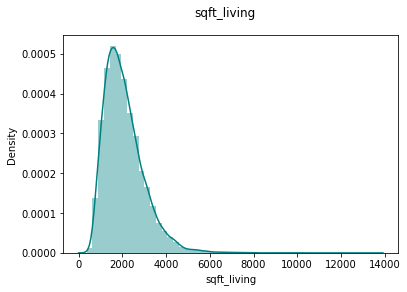

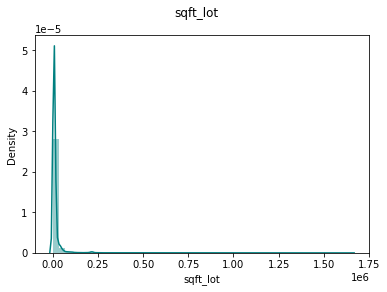

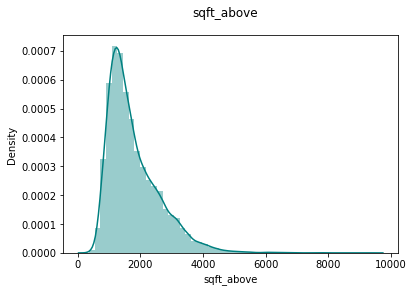

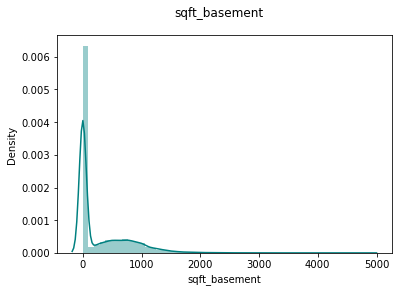

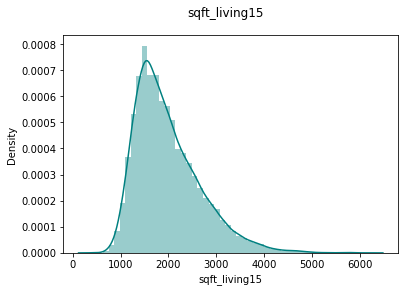

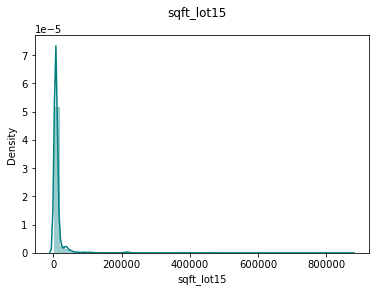

In [23]:
for col in ['sqft_living', 'sqft_lot','sqft_above','sqft_basement','sqft_living15', 'sqft_lot15']:
    sns.distplot(data[col], color = 'teal')
    plt.suptitle(col)
    plt.show()

* We can see that all these numerical variables we will use, are skewed to the right, some more heavily than others, so we will apply a logarithmic rescaling to all of them, later in the preprocessing. 

## 5.Preparing log that will plot the results
We start by creating a dataframe that will store the results of the tests, the test size we used, and a comment that will describe the wrangling steps that led us to this outcome. This way we can track easily the wrangling steps we went through, and we can learn what helps the model, and what is detrimental to its performance.  

In [24]:
#Create and reset the log with this cell
reg_log = pd.DataFrame(columns = ['r2','adj_r2','mse','rmse','mae','test_size','comment'])

In [122]:
def apply_linear_regression(X,y,testsize = 0.4,comment = "No comment added"):
    """
    This function will be used to apply a linear regression, log and print the results, the comments, and 
    save them in the log dataframe. Will return the same list logged in the dataframe. 
    A log pandas dataframe will have to be created beforehand executing this script:
    reg_log = pd.DataFrame(columns = ['r2','adj_r2','mse','rmse','mae','comment'])
        
    """
    
    #Train test split, we can change the test size with the input, 40% will be default
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, random_state=100)
    
    #Assigning the model we will use, applying it and calculating test predictions 
    lm = linear_model.LinearRegression()
    model = lm.fit(X_train,y_train)
    predictions  = lm.predict(X_test)
    
    #Calculating and printing the test indicators
    r2 = r2_score(y_test, predictions)
    print( "r2 Score:   ",round(r2,4))
    
    n = len(X_test) 
    p = X_test.shape[1]
    adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
    print("Adj. r2 Score:    ",round(adj_r2,4))
    
    mse = mean_squared_error(y_test, predictions)
    print("MSE Score:  ",round(mse,4))
    
    rmse = mse**(1/2)
    print("RMSE Score: ", round(rmse,4))
    
    mae = mean_absolute_error(y_test, predictions)
    print("MAE Score :",round(mae,4))
    
    print("Comment:", comment)
    print("Test size:", int(testsize*100), "%")
    
    global reg_log
    
    log_inp = [r2,adj_r2,mse,rmse,mae,testsize,comment]
    
    reg_log.loc[len(reg_log)+1] = log_inp
    
    sns.scatterplot(y_test, predictions, alpha=0.3)
    sns.regplot(y_test, predictions, truncate=True, scatter_kws={'s': 14, 'alpha':0.3}, line_kws={'color':'teal', 'linewidth': 2})
    plt.xlabel("Real prices:")
    plt.ylabel("Predictions:")
    plt.show()
    
    return model


Here we prepared a function that plots our progress over each attempt, so we can keep track of our outcome better:

In [26]:
#This will plot my progress of r2 and the mean squared error over each trial of optimization. 
def plot_log_show():
    plt.figure(figsize=(10,8))
    plot = sns.lineplot(data=reg_log.r2, color="b",marker = "o")
    plot.set_xlabel("Iterations",fontsize=20)
    plot.set_ylabel("r2 Score",fontsize=25)
    plt.show()
    
    plt.figure(figsize=(10,8))
    plot = sns.lineplot(data=reg_log.mae, color="r",marker = "o")
    plot.set_xlabel("Iterations",fontsize=20)
    plot.set_ylabel("Mean Absolute Error",fontsize=25)
    plt.show()

## 6.Pre processing / Wrangling and execution of linear regression model
Now that we have our tools to apply the model, we will start transforming the data, applying the model and testing it at each step, in order to gain knowledge over if our steps actually are beneficial or detrimental to the linear model.

Let's check for multicollinearity and see if we should drop certain columns in the first place:

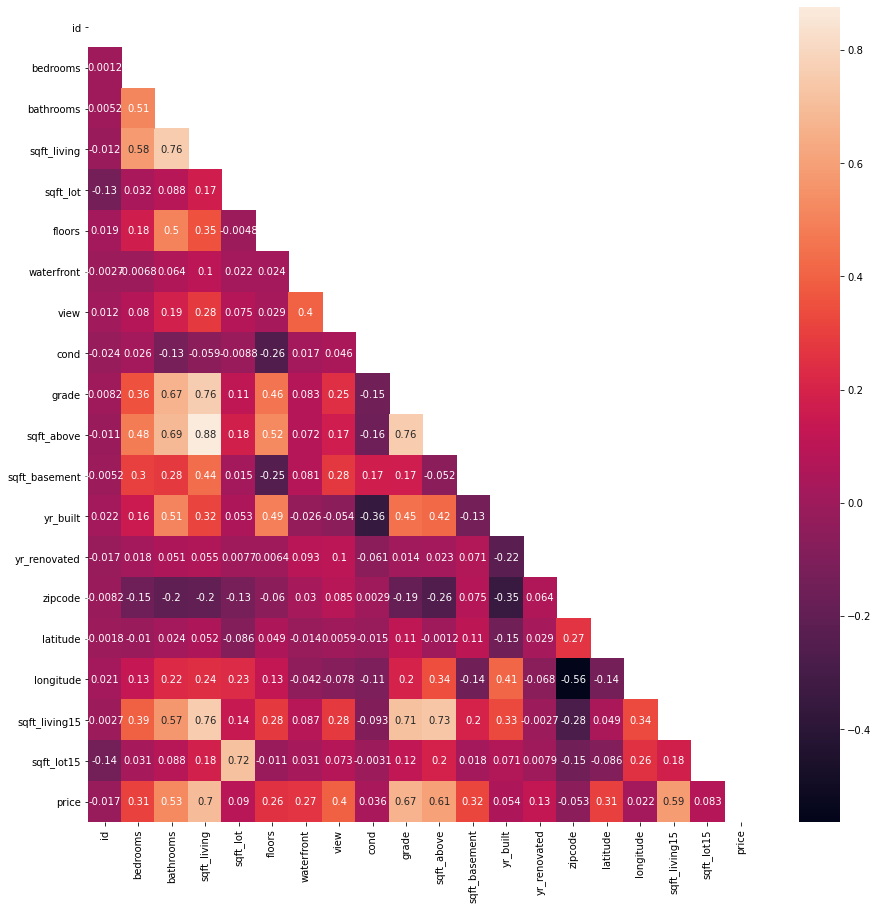

In [27]:
 def corr_matr_show(data):
    correlations_matrix = data.corr()
    mask = np.zeros_like(correlations_matrix)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
    plt.show()
    
corr_matr_show(data)

The only measure I would touch later is sqft_above/sqft_living, as the correlation is very high.  We will start by creating the first log, by applying the model roughly and create a baseline with which we can compare our results.

In [28]:
#minmaxscaler for the date
def minmax_apply(date_series):
    dates = minmax_scale(date_series)
    return pd.DataFrame(dates.reshape(-1,1))

#StandardScaler for the numerical values, we input a dataframe and itll return it normalised
def stscaler_apply(X_pre):
    transformer = StandardScaler().fit(X_pre)
    return pd.DataFrame(transformer.transform(X_pre))

#OneHotEncoder for categorical data, used later.
def onehot_apply(data):
    le= preprocessing.LabelEncoder()
    data_2 = data.apply(le.fit_transform)
    
    enc = preprocessing.OneHotEncoder()
    enc.fit(data_2)
    onehotlabels = enc.transform(data_2).toarray()
    return pd.DataFrame(onehotlabels)

#Function for logarithmic rescaling
def log_transfom_clean_(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN 

#Function to apply the rescaling, will show the results before and after, to reassure the analyst. 
#We can run the function once, with disp = True, to just check what would happen, or we can assign
#it to the column, or a new column to keep the result. 
def map_column_log_nan(data, col,disp = True):
    #We show the data before
    if disp == True:
        sns.distplot(data[col])
        plt.suptitle(col+" before log normalization")
        plt.show()
    
    temp = list(map(log_transfom_clean_, data[col]))
    temp = pd.Series(temp).fillna(np.mean(temp))
    
    #and after
    if disp == True:
        sns.distplot(temp)
        plt.suptitle(col+" after log normalization")
        plt.show()
    
    return temp

### 1st run: Measuring a baseline with simple scaling of variables and almost no wrangling

In [29]:
#we copy the original data to make a wrangling copy, so we can always recall originals when needed. 
datawr = pd.DataFrame(data)

#We deal with dates separately, as we use another scaler. 
dates = minmax_apply(datawr['date_sold'])

#And we can start dropping id, date
datawr.drop(['id','date_sold'],axis =1, inplace = True)


#And we apply scaler to numericals:
X_stand = stscaler_apply(datawr.drop(['price'],axis =1))

X = pd.concat((dates,X_stand), axis = 1)
y = datawr['price']

r2 Score:    0.7695
Adj. r2 Score:     0.768
MSE Score:   25687494815.0432
RMSE Score:  160273.1881
MAE Score : 105310.6737
Comment: First log, minmaxscaler for date, standardscaler for all numericals, drop id
Test size: 40 %


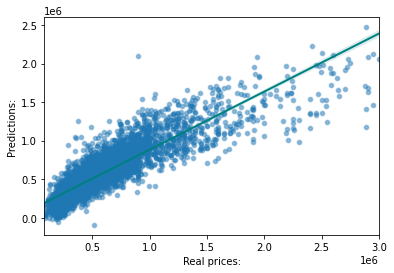

LinearRegression()

In [123]:
apply_linear_regression(X,y,.4,"First log, minmaxscaler for date, standardscaler for all numericals, drop id")

### 2nd run: breaking multicollinearity

* For the first transformation we saw that sqft_living = sqft_above + sqft_below, in every case. We proved it this way, by counting the number of rows where this doesn't happen

In [31]:
sum(data['sqft_living'] != (data['sqft_above']+data['sqft_basement']))

0

We will then make a new row consisting of how much percentage of the living space corresponds to basement space,instead of having both living and above space in the dataset:

In [32]:
datawr['percent_basement'] = datawr['sqft_basement'] / datawr['sqft_living']
#and we drop the original columns
datawr.drop(['sqft_basement','sqft_above'], axis = 1, inplace = True)

We can see in the new correlation matrix that we broke that multicollinearity, but we still kept the information about basement sizes

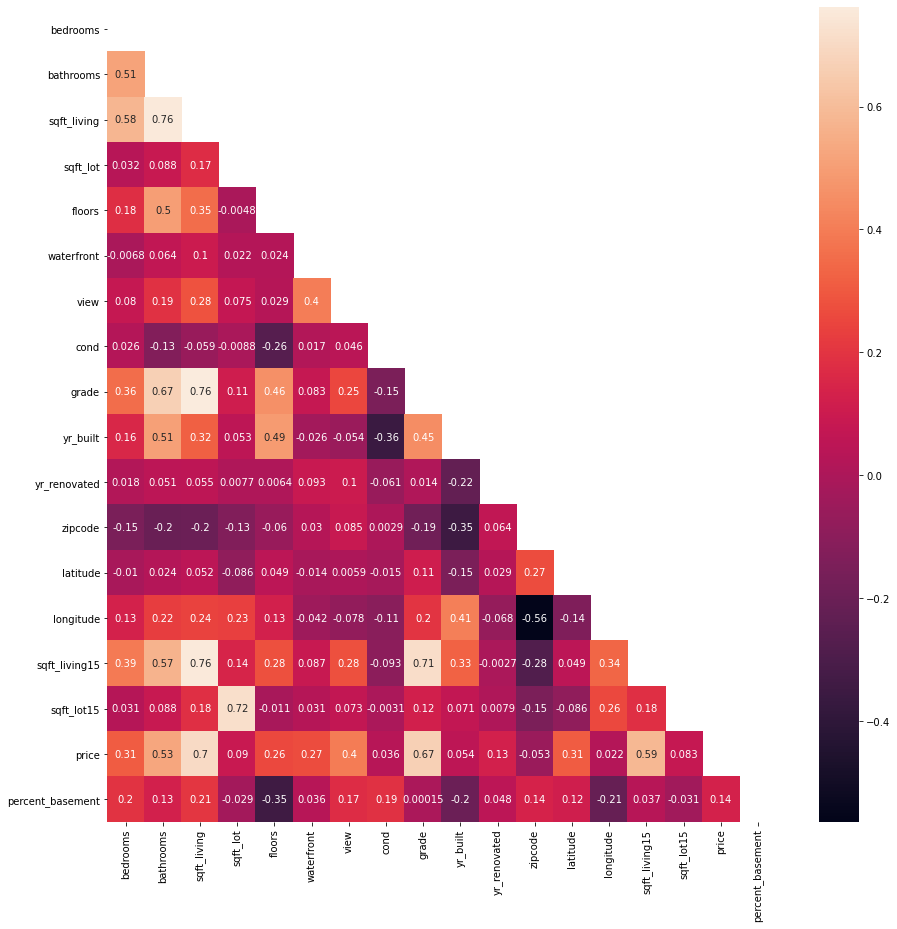

In [33]:
corr_matr_show(datawr)

In [34]:
#We pass the scaler again to our numerical values in order to apply the model again 
X_stand = stscaler_apply(datawr.drop(['price'],axis =1))

X = pd.concat((dates,X_stand), axis = 1)
y = datawr['price']

r2 Score:    0.6986
Adj. r2 Score:     0.6979
MSE Score:   43746660752.507
RMSE Score:  209157.0242
MAE Score : 126022.7457
Comment: Removed multicollinearity sqft_above with sqft_living, created %basement
Test size: 40 %


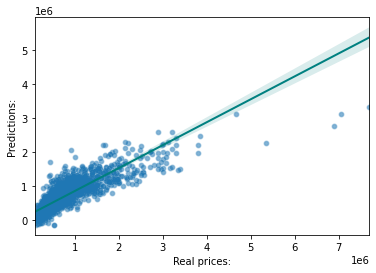

LinearRegression()

In [35]:
apply_linear_regression(X,y,.4,"Removed multicollinearity sqft_above with sqft_living, created %basement")

We can see an improvement in both scores, r2 is slightly better, but the mse score has dropped slightly 


### 3rd run: managing renovation_date

* We can change the last refurbished year to years since last renovation, to make it more measurable. We will assume it is 2016

In [36]:
datawr['yr_since_last_ren'] = [2016-x if x!=0 else 2016-datawr.loc[i,'yr_built'] for i,x in enumerate(datawr['yr_renovated'])]

And we can also drop the orignal columns, keeping the information

In [37]:
datawr.drop(['yr_renovated'],axis =1, inplace = True)

In [38]:
X_stand = stscaler_apply(datawr.drop(['price'],axis =1))

X = pd.concat((dates,X_stand), axis = 1)
y = datawr['price']

r2 Score:    0.6984
Adj. r2 Score:     0.6977
MSE Score:   43773901261.5342
RMSE Score:  209222.1338
MAE Score : 126053.8374
Comment: Added yr_since_last_ren, that measures how new the house is, and dropped original columns
Test size: 40 %


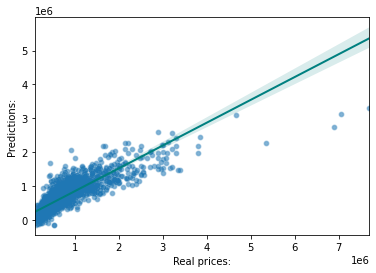

LinearRegression()

In [39]:
apply_linear_regression(X,y,.4,"Added yr_since_last_ren, that measures how new the house is, and dropped original columns")

We can turn the year built, also in a more scalable measure by substracting it to the current year:

In [40]:
datawr['yr_since_built'] = 2016 - datawr['yr_built']

And drop the original column:

In [41]:
datawr.drop(['yr_built'],axis =1, inplace = True)

In [42]:
X_stand = stscaler_apply(datawr.drop(['price'],axis =1))

X = pd.concat((dates,X_stand), axis = 1)
y = datawr['price']

### 4th run: converted construction year 

r2 Score:    0.6984
Adj. r2 Score:     0.6977
MSE Score:   43773901261.5342
RMSE Score:  209222.1338
MAE Score : 126053.8374
Comment: Added yr_since_built and dropped the original year
Test size: 40 %


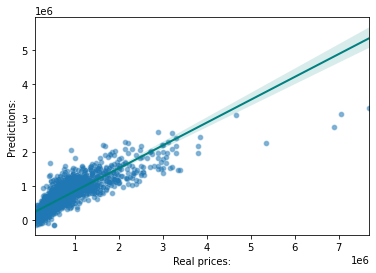

LinearRegression()

In [43]:
apply_linear_regression(X,y,.4,"Added yr_since_built and dropped the original year")

this created some collinearity and did not improve the result, so we will find another way to input the year built. we will scale the original year column with minmaxscaler instead.

In [44]:
built_year = pd.to_datetime(data['yr_built']) 
built_year = minmax_apply(built_year)


In [45]:
datawr.drop(['yr_since_built'],axis =1, inplace = True)

In [46]:
X_stand = stscaler_apply(datawr.drop(['price'],axis =1))

X = pd.concat((dates,built_year,X_stand), axis = 1)
y = datawr['price']

### 5th run: using scaler on year columns 

r2 Score:    0.6984
Adj. r2 Score:     0.6977
MSE Score:   43773901261.5342
RMSE Score:  209222.1338
MAE Score : 126053.8374
Comment: used minmaxscaler for built year, dropped yr_since_built
Test size: 40 %


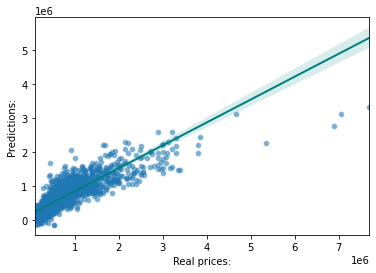

LinearRegression()

In [47]:
apply_linear_regression(X,y,.4,"used minmaxscaler for built year, dropped yr_since_built")

Not a lot of change here. 


* Now we should decide if we use sqft_living15 and sqft_lot15, or the other columns, labeled sqft_living and sqft_lot, as having both probably is causing some overfitting, as both measures refer to the same thing.
* Starting by testing sqft_living15 and sqft_lot15, as they seem more recent data

In [48]:
datawr.drop(['sqft_living','sqft_lot'],axis = 1, inplace = True)

In [49]:
X_stand = stscaler_apply(datawr.drop(['price'],axis =1))

X = pd.concat((dates,built_year,X_stand), axis = 1)
y = datawr['price']

### 6th run: testing more recent sqft measure columns

r2 Score:    0.6523
Adj. r2 Score:     0.6517
MSE Score:   50458276474.4853
RMSE Score:  224629.1977
MAE Score : 132055.262
Comment: testing sqft_living15 and sqft_lot15, dropping the others
Test size: 40 %


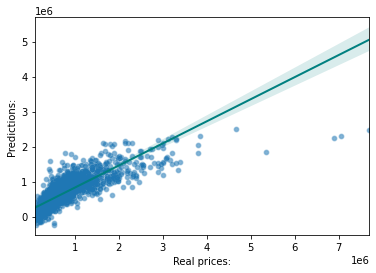

LinearRegression()

In [50]:
apply_linear_regression(X,y,.4,"testing sqft_living15 and sqft_lot15, dropping the others")

The average error increased as expected, and r2 decreased, 
* let's try now with the other two columns:

In [51]:
datawr = pd.concat((datawr,data[['sqft_living','sqft_lot']]),axis = 1)
datawr.drop(['sqft_living15','sqft_lot15'],axis = 1, inplace = True)

In [52]:
X_stand = stscaler_apply(datawr.drop(['price'],axis =1))

X = pd.concat((dates,built_year,X_stand), axis = 1)
y = datawr['price']

### 7th run: using the older sqft columns 

r2 Score:    0.6978
Adj. r2 Score:     0.6972
MSE Score:   43857606330.5158
RMSE Score:  209422.077
MAE Score : 126252.0601
Comment: testing sqft_living and sqft_lot, dropping the ones used previously 
Test size: 40 %


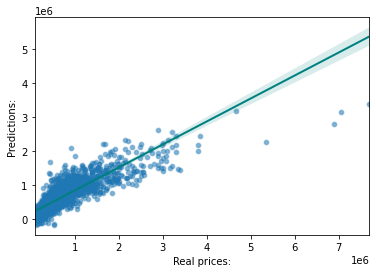

LinearRegression()

In [53]:
apply_linear_regression(X,y,.4,"testing sqft_living and sqft_lot, dropping the ones used previously ")

* Now we will try to remove the sqft_living and sqft_lot, but we will choose the old size for prices of sales done before 2015, and use sqft_living15 and sqft_living15 for those sales done in 2015. Even if this is detrimental to the model, i believe having both with only create some overfitting, as it represents the same characteristic of the property in two different periods of time. 

In [54]:
datawr['sqft_living_sale'] = np.where(data['date_sold']>=datetime.datetime(2015,1,1), 
                                      data['sqft_living15'],data['sqft_living'])

datawr['sqft_lot_sale'] = np.where(data['date_sold']>=datetime.datetime(2015,1,1), 
                                      data['sqft_lot15'],data['sqft_lot'])


And drop the original columns. As we have no information about if the basement sizes were changed, we will leave the percentage we calculated before.

In [55]:
datawr.drop(['sqft_living','sqft_lot'],axis = 1,inplace = True)

In [56]:
X_stand = stscaler_apply(datawr.drop(['price'],axis =1))

X = pd.concat((dates,built_year,X_stand), axis = 1)
y = datawr['price']

### 8th run: mixed solution

r2 Score:    0.6827
Adj. r2 Score:     0.6821
MSE Score:   46045359999.7555
RMSE Score:  214581.8259
MAE Score : 128092.354
Comment: selected the sqft columns depending on sale year
Test size: 40 %


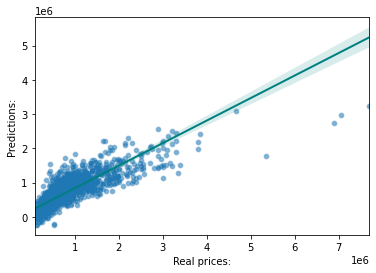

LinearRegression()

In [57]:
apply_linear_regression(X,y,.4,"selected the sqft columns depending on sale year")

Seems like the performance dropped slighlty, so we will keep the original columns sqft_living and sqft_lot, and drop this last calculation, as it performs best. 

In [58]:
datawr.drop(['sqft_living_sale','sqft_lot_sale'], axis = 1, inplace = True)
datawr = pd.concat((datawr,data[['sqft_living','sqft_lot']]),axis = 1)

In [59]:
X_stand = stscaler_apply(datawr.drop(['price'],axis =1))

X = pd.concat((dates,built_year,X_stand), axis = 1)
y = datawr['price']

### 9th run: rolling back to the beginning

r2 Score:    0.6978
Adj. r2 Score:     0.6972
MSE Score:   43857606330.5158
RMSE Score:  209422.077
MAE Score : 126252.0601
Comment: rolled back to using sqft_lot and sqft_living
Test size: 40 %


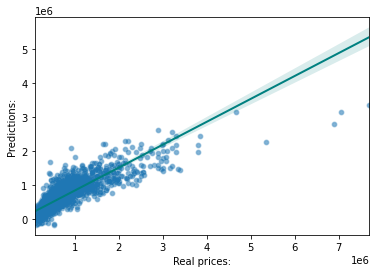

LinearRegression()

In [60]:
apply_linear_regression(X,y,.4,"rolled back to using sqft_lot and sqft_living")

### 10th run: applying logarithmic scaling to numerical variables

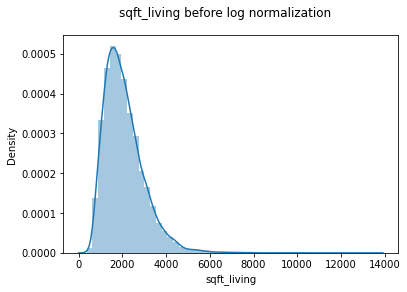

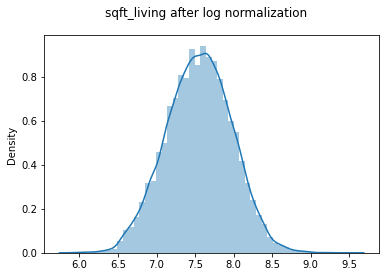

0        7.073270
1        7.851661
2        6.646391
3        7.580700
4        7.426549
           ...   
21592    7.333023
21593    7.745003
21594    6.927558
21595    7.377759
21596    6.927558
Length: 21597, dtype: float64

In [61]:
map_column_log_nan(datawr,'sqft_living')

Very nice normalization, we will overwrite it:

In [62]:
datawr['sqft_living'] = map_column_log_nan(datawr,'sqft_living',disp=False)

* We check with the size of the lots too 

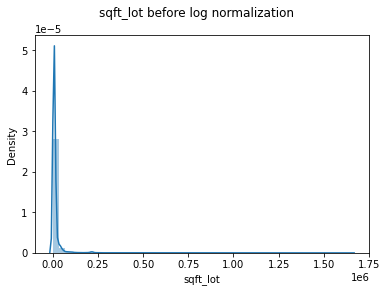

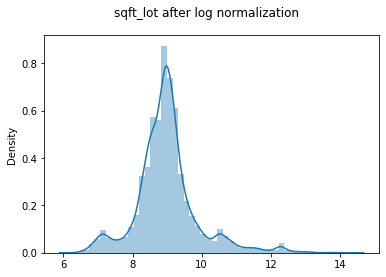

0        8.639411
1        8.887653
2        9.210340
3        8.517193
4        8.997147
           ...   
21592    7.030857
21593    8.667852
21594    7.207860
21595    7.778211
21596    6.981006
Length: 21597, dtype: float64

In [63]:
map_column_log_nan(datawr,'sqft_lot')

In [64]:
datawr['sqft_lot'] = map_column_log_nan(datawr,'sqft_lot',disp=False)

In [65]:
X_stand = stscaler_apply(datawr.drop(['price'],axis =1))

X = pd.concat((dates,built_year,X_stand), axis = 1)
y = datawr['price']

r2 Score:    0.6492
Adj. r2 Score:     0.6486
MSE Score:   50907895085.5306
RMSE Score:  225627.78
MAE Score : 132622.3995
Comment: log scaling in living and lot surfaces
Test size: 40 %


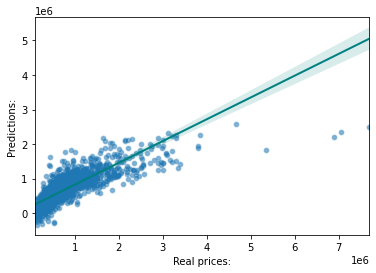

LinearRegression()

In [66]:
apply_linear_regression(X,y,.4,"log scaling in living and lot surfaces")

### 11th run: bringing foreign data to classify the different areas

* We try now to drop latitude and longitude, and turn the zip codes into state codes. for that we need to import a zipcode database, and join it to our original data. We can also use this data for our tableau visualization later.  

In [67]:
zipc = pd.read_csv('zip_code_database.csv')

In [68]:
zipc = zipc[['zip','state','primary_city','irs_estimated_population_2015']]
zipc.rename(columns= {'zip':'zipcode'},inplace = True)

In [69]:
datawr = pd.merge(datawr, zipc, on='zipcode',how='left')

In [70]:
datawr['state'].value_counts()

WA    21597
Name: state, dtype: int64

In [71]:
datawr['primary_city'].value_counts()

Seattle          8973
Renton           1597
Bellevue         1407
Kent             1201
Kirkland          977
Redmond           977
Auburn            911
Sammamish         800
Federal Way       779
Issaquah          733
Maple Valley      589
Woodinville       471
Snoqualmie        308
Kenmore           283
Mercer Island     282
Enumclaw          233
North Bend        220
Bothell           195
Duvall            190
Carnation         124
Vashon            117
Black Diamond     100
Fall City          80
Medina             50
Name: primary_city, dtype: int64

All sales data correspond to Washington state, so we will drop the state column, as well as latitude, logitude, and the zip codes, and we will start encoding categorical data, starting by the city.

* Creating Categorical data:

In [72]:
datawr.drop(['zipcode','state','latitude','longitude','zipcode'], axis =1,inplace = True)

In [73]:
datawr.dtypes

bedrooms                           int64
bathrooms                        float64
floors                           float64
waterfront                         int64
view                               int64
cond                               int64
grade                              int64
price                              int64
percent_basement                 float64
yr_since_last_ren                  int64
sqft_living                      float64
sqft_lot                         float64
primary_city                      object
irs_estimated_population_2015      int64
dtype: object

We will quickly use get_dummies for the primary city column, and evaluate the change in our model.

In [74]:
datawr_cat = pd.get_dummies(datawr['primary_city'])
datawr_num = datawr.select_dtypes('number')

In [75]:
X_stand = stscaler_apply(datawr_num.drop(['price'],axis =1))

X = pd.concat((dates,built_year,X_stand,datawr_cat), axis = 1)
y = datawr['price']

r2 Score:    0.6844
Adj. r2 Score:     0.683
MSE Score:   45797365829.7534
RMSE Score:  214003.1912
MAE Score : 125726.8713
Comment: added city categorical data and population, dropped location columns
Test size: 40 %


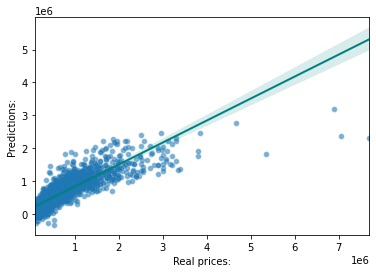

LinearRegression()

In [76]:
apply_linear_regression(X,y,.4,"added city categorical data and population, dropped location columns")

Here we found the model fits the prediction much better, and the mean absolute error has been reduced. 

## 12th run: turning city, waterfront and floors into categorical data


* Let's turn more data into categorical data

In [77]:
categories = ['floors', 'waterfront','primary_city']
datawr_cat = datawr[categories]
datawr_num = datawr.drop(categories, axis = 1)

In [78]:
datawr_cat =onehot_apply(datawr_cat)

In [79]:
X_stand = stscaler_apply(datawr_num.drop(['price'],axis =1))

X = pd.concat((dates,built_year,X_stand,datawr_cat), axis = 1)
y = datawr['price']

r2 Score:    0.6866
Adj. r2 Score:     0.685
MSE Score:   45478218915.5583
RMSE Score:  213256.2283
MAE Score : 125344.5049
Comment: turned city, waterfront and floors into categorical data
Test size: 40 %


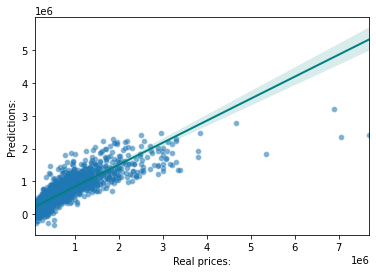

LinearRegression()

In [80]:
apply_linear_regression(X,y,.4,"turned city, waterfront and floors into categorical data")

### 13th run: removing outliers with binning

* Now let's take over the cleaning of outliers we mentioned in the EDA. First turning number of bathrooms into bins, and grouping all listings that have more than 6 bathrooms into those categories

In [81]:
bin_labels = [1, 2, 3, 4, 5, 6 ]
datawr['bathrooms'] = pd.cut(datawr['bathrooms'],
                              bins=[0, 1, 2, 3, 4, 5, 20],
                              labels=bin_labels)

In [82]:
categories = ['floors', 'waterfront','primary_city','bathrooms']
datawr_cat = datawr[categories]
datawr_num = datawr.drop(categories, axis = 1)

In [83]:
datawr_cat =onehot_apply(datawr_cat)

In [84]:
X_stand = stscaler_apply(datawr_num.drop(['price'],axis =1))

X = pd.concat((dates,built_year,X_stand,datawr_cat), axis = 1)
y = datawr['price']

r2 Score:    0.7122
Adj. r2 Score:     0.7106
MSE Score:   41761927414.0166
RMSE Score:  204357.3522
MAE Score : 120051.7998
Comment: cleaned outliers in bathroom, turned to categorical
Test size: 40 %


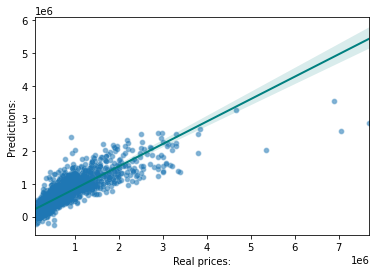

LinearRegression()

In [85]:
apply_linear_regression(X,y,.4,"cleaned outliers in bathroom, turned to categorical")

### 14th run: more binning 

* Same thing we do now with bedrooms, putting all of those over 8 in the same category, and encode it as categorical data

In [86]:
datawr['bedrooms'] = [8 if x>=8 else x for x in datawr['bedrooms']]

In [87]:
categories = ['floors', 'waterfront','primary_city','bathrooms','bedrooms']
datawr_cat = datawr[categories]
datawr_num = datawr.drop(categories, axis = 1)

In [88]:
datawr_cat =onehot_apply(datawr_cat)

In [89]:
X_stand = stscaler_apply(datawr_num.drop(['price'],axis =1))

X = pd.concat((dates,built_year,X_stand,datawr_cat), axis = 1)
y = datawr['price']

r2 Score:    0.7128
Adj. r2 Score:     0.7109
MSE Score:   41686436446.0346
RMSE Score:  204172.5654
MAE Score : 120104.5997
Comment: cleaned outliers in bedrooms, turned to categorical
Test size: 40 %


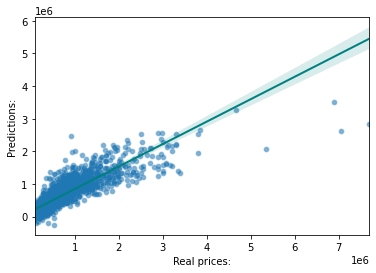

LinearRegression()

In [90]:
apply_linear_regression(X,y,.4,"cleaned outliers in bedrooms, turned to categorical")

### 15th run: removing exreme outliers

* Finally let's try to remove some noise from extremely expensive properties, or the ones with too many lots, as well as the little ones we have with grade 3, as those don't pass the basic building norms, and are not representative.

Before deleting rows we have to put back the data together:

In [91]:
data_add = pd.concat((dates,built_year,datawr), axis = 1)

* we can cut properties over 3m dollars price

<AxesSubplot:xlabel='price'>

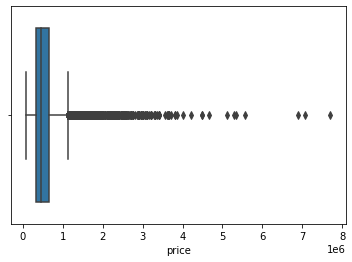

In [92]:
sns.boxplot(data = data, x = 'price')

In [93]:
data_add = data_add[data_add['price']<= 3000000]

*  In the case of the lots, let's cut at  0.5M sqft of lot and over

<AxesSubplot:xlabel='sqft_lot'>

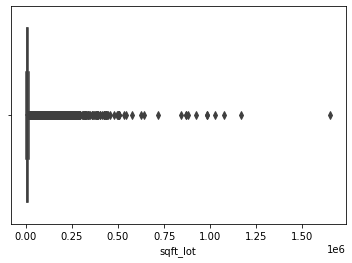

In [94]:
sns.boxplot(data = data, x = 'sqft_lot')

In [95]:
data_add = data_add[data_add['sqft_lot']<= 250000]

* The size of the houses, let's use those under 8000 sqft

<AxesSubplot:xlabel='sqft_living'>

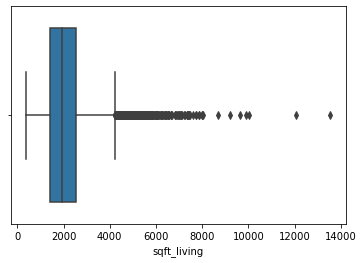

In [96]:
sns.boxplot(data = data, x = 'sqft_living')

In [97]:
data_add = data_add[data_add['sqft_living']<= 500000]

In [98]:
datawr = data_add.reset_index(drop=True)

In [99]:
categories = ['floors', 'waterfront','bathrooms','bedrooms','primary_city']
datawr_cat = datawr[categories]
datawr_num = datawr.drop(categories, axis = 1)

In [100]:
datawr_cat =onehot_apply(datawr_cat)

In [101]:
X_stand = stscaler_apply(datawr_num.drop(['price'],axis =1))

X = pd.concat((X_stand,datawr_cat), axis = 1)
y = datawr['price']

r2 Score:    0.7326
Adj. r2 Score:     0.7309
MSE Score:   28084267165.3779
RMSE Score:  167583.6125
MAE Score : 113173.9514
Comment: removed some noise with very high outliers
Test size: 40 %


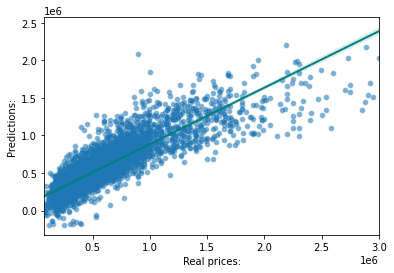

LinearRegression()

In [102]:
apply_linear_regression(X,y,.4,"removed some noise with very high outliers")

### 16th run: trying other scaling methods

* To end, will try other scalers in the variables. Will use minmaxscaler for view, condition, grade, percent basement, and year since last renovation, keeping the sizes of living, lot, and population of the city in the standardscaler.  

In [103]:
cat_cols = ['floors', 'waterfront','bathrooms','bedrooms','primary_city']
datawr_cat = datawr[cat_cols]
datawr_cat = onehot_apply(datawr_cat)

In [104]:
minmax_cols = ['view','cond','grade','percent_basement','yr_since_last_ren']
datawr_minmax = datawr[minmax_cols]
for col in minmax_cols:
    datawr_minmax[col] = minmax_apply(datawr_minmax[col])
    datawr_minmax[col] = datawr_minmax[col].fillna(0)

In [105]:
datawr_num = datawr.drop(cat_cols+minmax_cols, axis = 1)

X_stand = stscaler_apply(datawr_num.drop(['price',0,'irs_estimated_population_2015'],axis =1))

In [106]:
X = pd.concat((X_stand,datawr_cat,datawr_minmax,datawr[0]), axis = 1)
y = datawr['price']

r2 Score:    0.7322
Adj. r2 Score:     0.7305
MSE Score:   28130725655.9205
RMSE Score:  167722.1681
MAE Score : 113012.2203
Comment: changed decisions on scaling
Test size: 40 %


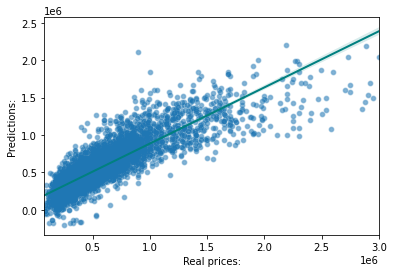

In [107]:
model = apply_linear_regression(X,y,.4,"changed decisions on scaling")

# 7. Conclusions

Going through this process helped to throw some light into the process and impact of wrangling for linear regression models. 
In this exercise a final Median Absolute Error of 113.936 Dollars, being the average sale price 540000 dollars, a model that predicts with an accuracy of only 21 percent might not be of great use. 

In the other hand, many functions have been created in this notebook that can be very useful to quickly apply regression models to future datasets, and to monitor the performance of the model over the different decisions taken during the wrangling process. 

* Here is a graph of R2 and MAE over the attempts. 

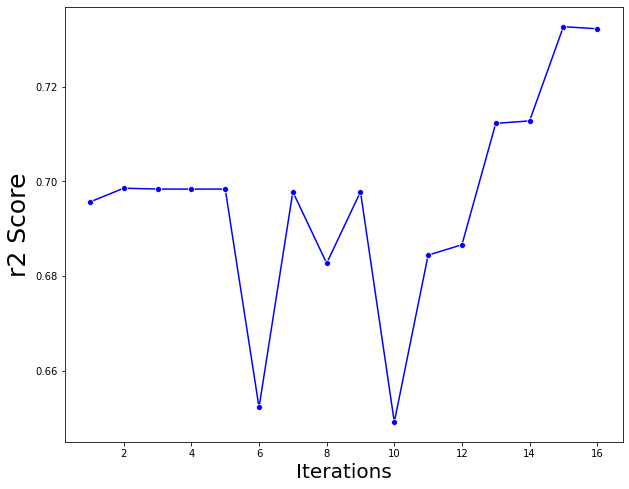

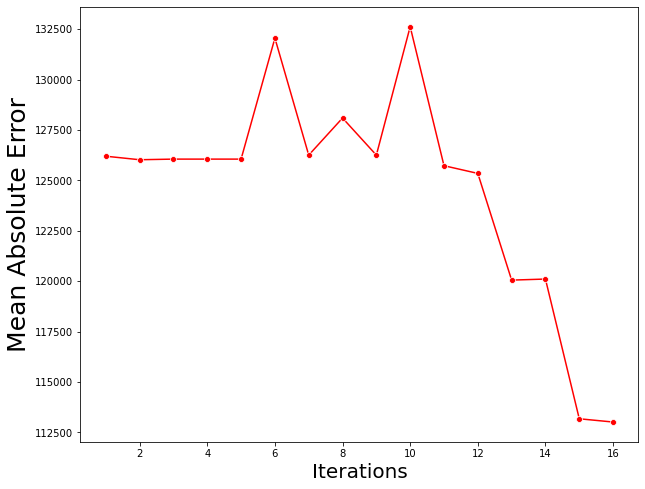

In [108]:
plot_log_show()

This dataframe shows all the log entries, with the comments 

In [109]:
reg_log

,r2,adj_r2,mse,rmse,mae,test_size,comment
1,0.695647,0.694976,4.416906e+10,210164.353993,126197.226043,0.4,"First log, minmaxscaler for date, standardscal..."
2,0.698557,0.697928,4.374666e+10,209157.024153,126022.745674,0.4,Removed multicollinearity sqft_above with sqft...
3,0.698369,0.697740,4.377390e+10,209222.133775,126053.837383,0.4,"Added yr_since_last_ren, that measures how new..."
4,0.698369,0.697740,4.377390e+10,209222.133775,126053.837383,0.4,Added yr_since_built and dropped the original ...
5,0.698369,0.697740,4.377390e+10,209222.133775,126053.837383,0.4,"used minmaxscaler for built year, dropped yr_s..."
6,0.652310,0.651664,5.045828e+10,224629.197734,132055.261959,0.4,"testing sqft_living15 and sqft_lot15, dropping..."
7,0.697793,0.697232,4.385761e+10,209422.076989,126252.060118,0.4,"testing sqft_living and sqft_lot, dropping the..."
8,0.682718,0.682129,4.604536e+10,214581.825884,128092.353973,0.4,selected the sqft columns depending on sale year
9,0.697793,0.697232,4.385761e+10,209422.076989,126252.060118,0.4,rolled back to using sqft_lot and sqft_living
10,0.649212,0.648561,5.090790e+10,225627.779951,132622.399459,0.4,log scaling in living and lot surfaces


* Explorting the log for a better presentation

In [110]:
reg_log.to_csv("regression-log.csv")

**Things that worsened the model score:**
* Using sqft_living15 and sqft_lot15 instead of sqft_living and sqft_lot instead 
* Choosing one or another depending on when the property was sold, helped but wasn't as effective as just using sqft_living and sqft_lot, so in the 9th attempt we rolled it back to continue from a better score.
* The moment we applied logarithmic scaling, the mean absolute error and r2 score worsened

**Things that helped the improve the model:**
* Removing multicollinearity improved slightly the model
* Classify the zip codes into city names, and adding the number of inhabitants per city, by bringing another datasource and merging the data from both tables. 
* Turn certain columns into catetgoricals, like number of floors, and waterfront
* Turning number of bathrooms and bedrooms also to categorical, adding the very extreme values into the highest bins
* Removing some noise by ignoring listings with very extreme values that have very small representation in the data.

**Things that could be still worked on:**
* I believe the approach on how to to execute all these steps, could have been organised better, seeing it in retrospective, the following order might give better results:
1. Bringing data from other sources first so it can also be properly cleaned
2. Deal with extreme values 
3. Decide which rows fit better as categorical columns, making some clasiffications in the data
4. Normalizing and rescaling numeric data
5. Pre-processing and application of the model
* Applying other models of regression, for example K-nearest neighbours, or play with decision trees.
* Improving the visualization and the presentation of the log.
* Create a function that would return the estimated price of a property by inputting its characteristics.



## 8. Putting all together
Based on the conclusions that we made before, we will apply only what was beneficial to our model. As seen in the results, the model improves slightly to a 77% R2 Score, and reduces the Mean absolute error to 105310$.

r2 Score:    0.7695
Adj. r2 Score:     0.768
MSE Score:   25687494815.0432
RMSE Score:  160273.1881
MAE Score : 105310.6737
Comment: One more iteration
Test size: 40 %


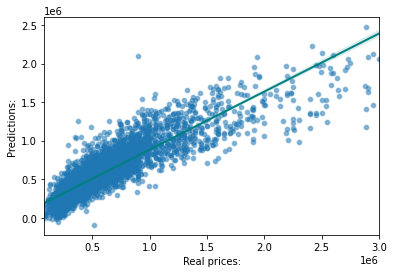

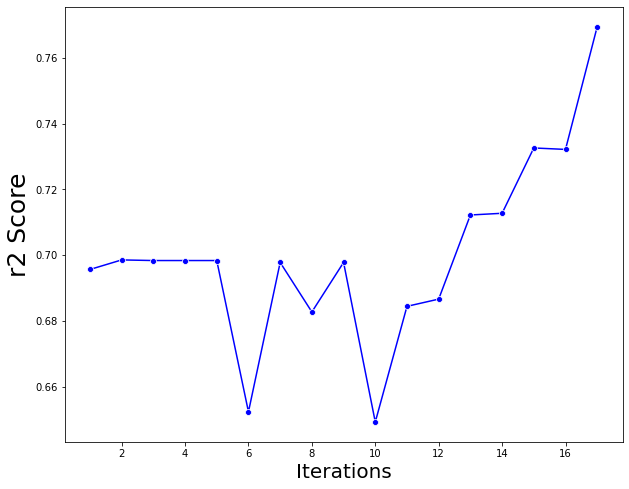

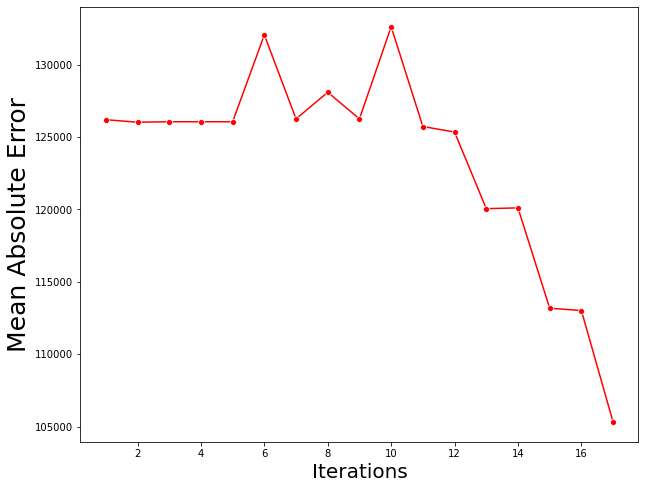

In [111]:
#Gather the columns we are interested, Join with the zip code database, and drop them, we decide to keep latitude and longitude this time
data_f = data.drop(['id','sqft_living15','sqft_lot15','sqft_above'],axis = 1)
data_f = pd.merge(data_f, zipc, on='zipcode',how='left').drop(['state','irs_estimated_population_2015'],axis = 1)
data_f.drop(['zipcode'],axis = 1 , inplace = True)

#Formatting date and time 
data_f['date_sold'] = pd.to_datetime(data_f['date_sold'])

#Removing outliers
data_f = data_f[data_f['price']<= 3000000]
data_f = data_f[data_f['sqft_lot']<= 250000]
data_f = data_f[data_f['sqft_living']<= 500000]
#Afer removing rows, resetting index
data_f.reset_index (drop = True,inplace = True)

#Binning extreme values into maximum bin
bin_labels = [1, 2, 3, 4, 5, 6 ]
data_f['bathrooms'] = pd.cut(data_f['bathrooms'],
                              bins=[0, 1, 2, 3, 4, 5, 20],
                              labels=bin_labels)

data_f['bedrooms'] = [8 if x>=8 else x for x in data_f['bedrooms']]


#Turning the basement size into a proportion of living area
data_f['per_basement'] = data_f['sqft_basement']/data_f['sqft_living']
data_f.drop(['sqft_basement'],axis = 1, inplace = True)

#OneHotEncoder for categoricals
data_f_cat = data_f[['floors','waterfront','bathrooms','bedrooms','primary_city']]
    
data_f_cat = onehot_apply(data_f_cat)

#Minmax for discrete variables
minmax_cols = ['date_sold','cond','grade','per_basement','yr_built','yr_renovated','view']
data_f_minmax = data_f[minmax_cols]
for col in minmax_cols:
    data_f_minmax[col] = minmax_apply(data_f_minmax[col])
    data_f_minmax[col] = data_f_minmax[col].fillna(0)
    
#Standardscaler for continuos variables    
data_f_num = data_f.drop(cat_cols+minmax_cols+['price'], axis = 1)
X_stand = stscaler_apply(data_f_num)

#putting it all together
X = pd.concat((X_stand,data_f_cat,data_f_minmax), axis = 1)
y = data_f['price']

#Running the model and logging the changes 
model = apply_linear_regression(X,y,.4,"One more iteration")

#Plotting the score
plot_log_show()